In [3]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad 

In [4]:
def load_data_merge(start,end):
    adata_list = []
    for i in range(start,end):
        input_dir = 'G:/dataset/1_DLPFC/input/'+str(i)+'/'
        adata_temp = sc.read_visium(input_dir)
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_label = pd.read_csv(input_dir + 'truth.csv', index_col=0)
        adata_temp.obs['batch'] = adata_label['batch'].astype("category")
        adata_temp.obs['ground.truth'] = adata_label['ground.truth'].astype("category")
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = [i for i in range(start,end)])
    return adata_pre

def load_data(start,end):
    adata_list = []
    for i in range(start,end):
        input_dir = 'G:/dataset/1_DLPFC/input/'+str(i)+'/'
        adata_temp = sc.read_visium(input_dir)
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_label = pd.read_csv(input_dir + 'truth.csv', index_col=0)
        adata_temp.obs['batch'] = adata_label['batch'].astype("category")
        adata_temp.obs['ground.truth'] = adata_label['ground.truth'].astype("category")
        adata_list.append(adata_temp)
    return adata_list


# SLAT embedding

In [4]:
embed1 = np.loadtxt(SLAT_path + '151508_151509__151508_SLAT_embeddeing.csv', delimiter=',')
embed2 = np.loadtxt(SLAT_path + '151508_151509__151509_SLAT_embeddeing.csv', delimiter=',')
print(embed1.shape)
print(embed1.shape)

(4384, 2048)
(4384, 2048)


# SLAT index

In [18]:
adata_list = load_data(151507, 151511)
print(adata_list)
# seurat embedding (18033, 50)  (15284, 50)  (14364, 50)
seurat_embedding_pd = pd.read_csv("G:/dataset/1_DLPFC/output/Seurat/Donor1/seurat.PCs.tsv")
print(seurat_embedding_pd.shape)
print(seurat_embedding_pd.iloc[:5,].head())

seurat_embedding_pd_list = []
index = 0
for adata in adata_list:
    seurat_embedding_pd_list.append(seurat_embedding_pd.iloc[ [i for i in range(index, index + adata.shape[0])] , : ])
    index = index + adata.shape[0]
    print(index)

for tmp_pd in seurat_embedding_pd_list:
    print(tmp_pd.shape)

D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils

[AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 4384 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 4789 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 4634 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'ground.truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial']
(18033, 50)
                           PC_1       PC_2      PC_3      PC_4      PC_5  \
AAACAACGAATAGTTC-1_1   2.430077   4.386316 -3.432069  4.971501 -5.658500   

0.500~0.550        94          2.144%
0.550~0.600       178          4.060%
0.600~0.650       335          7.641%
0.650~0.700       446         10.173%
0.700~0.750       672         15.328%
0.750~0.800       859         19.594%
0.800~0.850       823         18.773%
0.850~0.900       660         15.055%
0.900~0.950       247          5.634%
0.950~1.000        39          0.890%


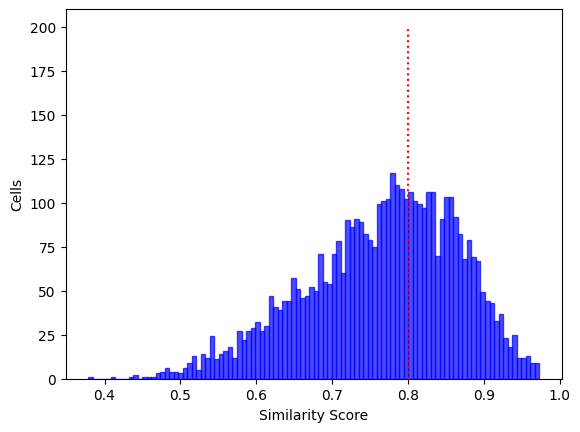

dataset1: 8 cell types; dataset2: 8 cell types; 
                    Total :8 celltypes; Overlap: 8 cell types 
                    Not overlap :[[]]
Subsample 300 cell pairs from 4384


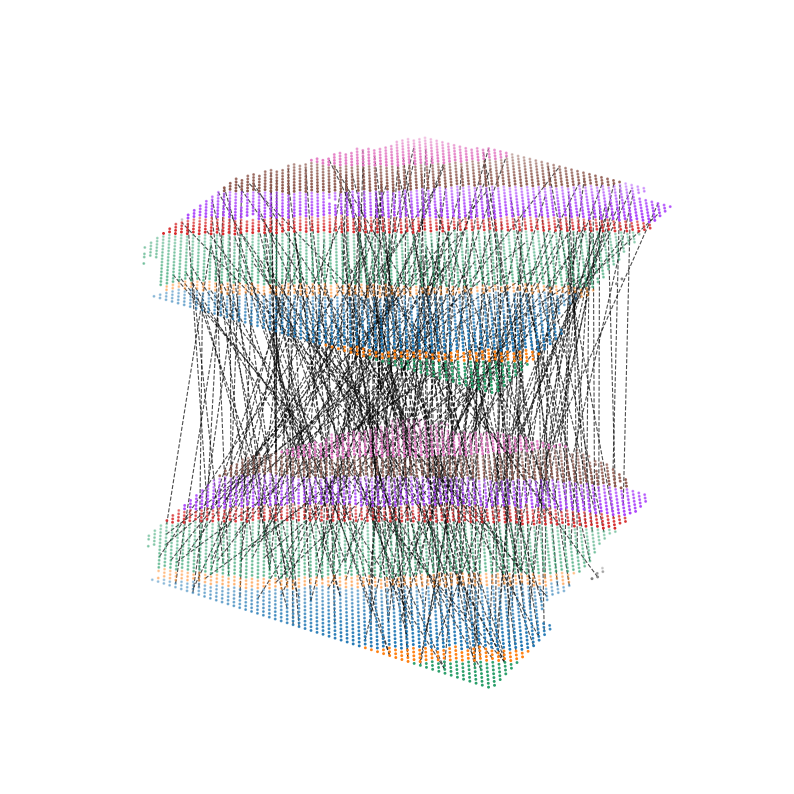

In [28]:
import scSLAT
from scSLAT.model import run_SLAT_multi,load_anndatas, Cal_Spatial_Net, run_SLAT, scanpy_workflow, spatial_match
from scSLAT.viz import match_3D_multi, build_3D, hist, Sankey, match_3D_celltype
from scSLAT.metrics import region_statistics

embd0 = seurat_embedding_pd_list[0].values
embd1 = seurat_embedding_pd_list[1].values
adata1 = adata_list[0]
adata2 = adata_list[1]

best, index, distance = spatial_match([embd0, embd1], reorder=False)
matching = np.array([range(index.shape[0]), best])

adata1_df = pd.DataFrame({'index': range(embd0.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype': adata1.obs['ground.truth']})
adata2_df = pd.DataFrame({'index': range(embd1.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype': adata2.obs['ground.truth']})
matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]
region_statistics(best_match, start=0.5, number_of_interval=10)
hist(best_match, cut=0.8)

all_match = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                              scale_coordinate=True, subsample_size=300)

all_match.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.2, 1.2],
                  line_color='black', show_error=False, hide_axis=True)



In [39]:
print(type(matching))
print(matching)
print(matching.shape)

<class 'numpy.ndarray'>
[[   0    1    2 ... 4381 4382 4383]
 [1130 1511 2868 ...  493 2745 3826]]
(2, 4384)


False    4226
Name: count, dtype: int64
False    4226
Name: count, dtype: int64
0.0004562043795620438
0.500~0.550        94          2.144%
0.550~0.600       178          4.060%
0.600~0.650       335          7.641%
0.650~0.700       446         10.173%
0.700~0.750       672         15.328%
0.750~0.800       859         19.594%
0.800~0.850       823         18.773%
0.850~0.900       660         15.055%
0.900~0.950       247          5.634%
0.950~1.000        39          0.890%


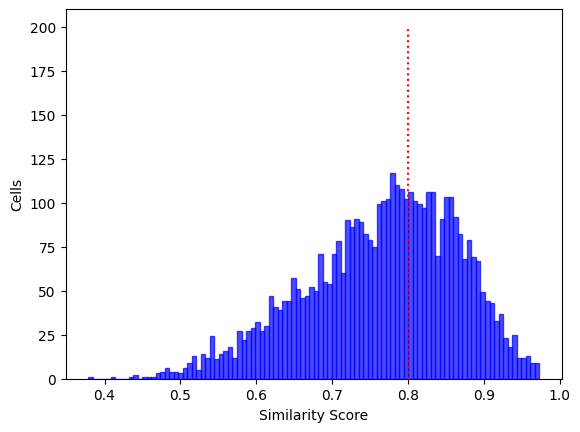

dataset1: 8 cell types; dataset2: 8 cell types; 
                    Total :8 celltypes; Overlap: 8 cell types 
                    Not overlap :[[]]
Subsample 300 cell pairs from 4384


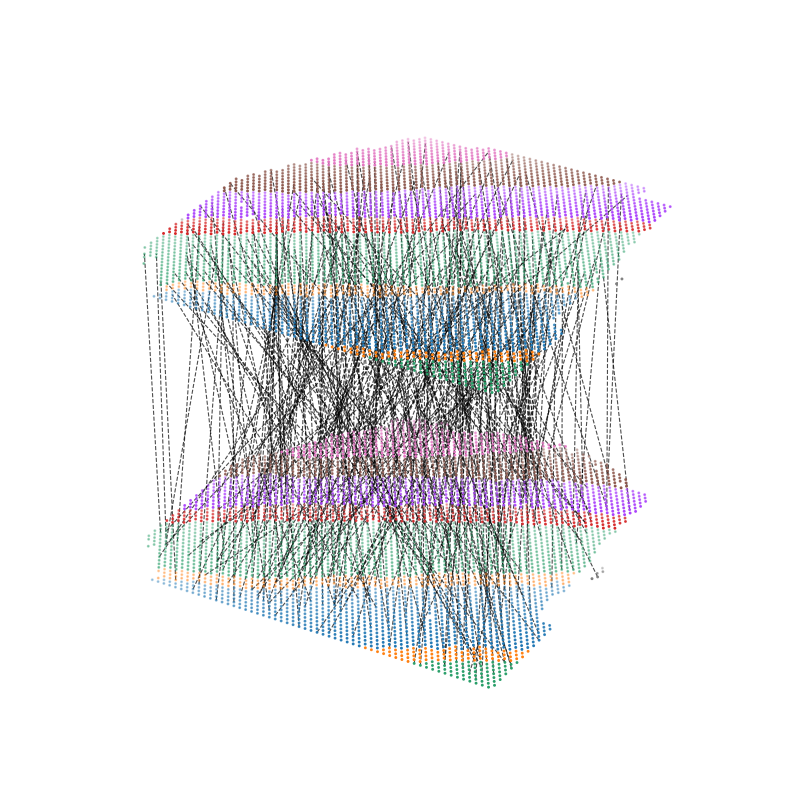

In [55]:
# SLAT metric test
from scSLAT.metrics import hit_k, hit_celltype, global_score, edge_score, euclidean_dis, __interval_statistics
from scSLAT.metrics import region_statistics


def hit_celltype(source_df:pd.DataFrame, 
                 target_df:pd.DataFrame,
                 matching:np.ndarray, 
                 meta:str='celltype'
    ) -> np.ndarray:
    r"""
    Statistics of cell type correct mapping ratio
        
    Parameters
    ----------
    source_df
        source dataset meta dataframe
    target_df
        target dataset meta dataframe
    matching
        cell correspondence array
    meta
        column name in source and target specify the celltype info  
    """
    
    assert all(item in source_df.columns.values for item in ['index','x','y',meta])
    assert all(item in target_df.columns.values for item in ['index','x','y',meta])
    
    graph_map = {}
    for i in range(matching.shape[1]):
        graph_map[str(matching[0,i])] = str(matching[1,i])
    source_df['target'] = 'unknown'
    source_df['target_celltype'] = 'unknown'
    
    for index in source_df['index']:
        index = str(index)
    target = graph_map[index]
    target_celltype = target_df[target_df['index']==int(target)]['celltype'].astype(str).values
    # print(dataset_B[dataset_B['index']==int(index)]['target'] )
    source_df.loc[source_df['index']==int(index), 'target'] = int(target)
    source_df.loc[source_df['index']==int(index),'target_celltype'] = target_celltype 
    
    result = (source_df['celltype'] == source_df['target_celltype']).value_counts()
    print(result)
    return result

print(hit_celltype(adata1_df, adata2_df, matching, meta='celltype'))
print(global_score([adata1, adata2], matching, biology_meta = 'ground.truth', topology_meta = 'ground.truth'))

region_statistics(best_match, start=0.5, number_of_interval=10)
hist(best_match, cut=0.8)

all_match = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                              scale_coordinate=True, subsample_size=300)
all_match.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.2, 1.2],
                  line_color='black', show_error=False, hide_axis=True)

# test = match_3D_celltype(adata1_df, adata2_df, matching[:, best_match > 0.7], meta='celltype', 
#                          subsample_size=3000, highlight_cell=['red'], scale_coordinate=True)
# test.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.25,2.5], hide_axis=True)

# SLAT sample

In [ ]:
#### paste

sys.path.append("../../scSLAT/viz")
from multi_dataset import match_3D_celltype, match_3D_multi

adata1 = sc.read_h5ad('./adata1.h5ad')
adata2 = sc.read_h5ad('./adata2.h5ad')

result = pd.read_csv('./paste_alignment.csv', index_col=0)

matching_index = np.argmax(result.to_numpy(),axis=0)
matching = np.array([np.arange(result.shape[1]),matching_index])

adata1_df = pd.DataFrame({'index':range(adata1.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype':adata1.obs['annotation']})
adata2_df = pd.DataFrame({'index':range(adata2.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype':adata2.obs['annotation']})

# from    https://github.com/gao-lab/SLAT/blob/main/case/mouse_development/Seurat_analysis.ipynb
# matching = np.array([range(index.shape[0]), best])
# best_match = distance[:,0]
# region_statistics(best_match, start=0.5, number_of_interval=10)

all_match = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                              scale_coordinate=True, subsample_size=300)

all_match.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.2, 1.2],
                  line_color='black', show_error=False, hide_axis=True)

all_celltypes = np.unique(adata1.obs['annotation']).tolist()

kidney_match = match_3D_celltype(adata1_df, adata2_df, matching, meta='celltype',
                                highlight_celltype=[['Urogenital ridge'], ['Kidney']],
                                scale_coordinate=True,
                                subsample_size=10000, highlight_cell=['red'])
kidney_match.draw_3D(size=[10, 12], line_width=1, point_size=[1.2,1.2], hide_axis=True)

In [ ]:
#### harmony

import numpy as np
import pandas as pd
import scanpy as sc
import torch
import harmonypy as hm
import faiss

import scSLAT
from scSLAT.model import run_SLAT_multi,load_anndatas, Cal_Spatial_Net, run_SLAT, scanpy_workflow, spatial_match
from scSLAT.viz import match_3D_multi, build_3D, hist, Sankey, match_3D_celltype
from scSLAT.metrics import region_statistics

adata1 = sc.read_h5ad('./adata1.h5ad')
adata2 = sc.read_h5ad('./adata2.h5ad')

adata_all = adata1.concatenate(adata2)
adata_all = scanpy_workflow(adata_all)
harm = hm.run_harmony(adata_all.obsm['X_pca'], adata_all.obs, 'batch', max_iter_harmony=20)
Z = harm.Z_corr.T
adata_all.obsm['X_harmony'] = Z

adata1.obsm['X_harmony'] = Z[:adata1.shape[0],:]
adata2.obsm['X_harmony'] = Z[adata1.shape[0]:,:]
embd0 = torch.from_numpy(adata1.obsm['X_harmony'])
embd1 = torch.from_numpy(adata2.obsm['X_harmony'])

best, index, distance = spatial_match([embd0, embd1], reorder=False)
matching = np.array([range(index.shape[0]), best])

adata1_df = pd.DataFrame({'index': range(embd0.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype': adata1.obs['annotation']})
adata2_df = pd.DataFrame({'index': range(embd1.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype': adata2.obs['annotation']})
matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]
region_statistics(best_match, start=0.5, number_of_interval=10)

all_match = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                              scale_coordinate=True, subsample_size=300)

all_match.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.2, 1.2],
                  line_color='black', show_error=False, hide_axis=True)